# Magnetic and Diagenetic Analyses of Tamuntuan et al. (2015)
_____

Paper doi: https://doi.org/10.1016/j.palaeo.2014.12.008

Core: IDLE-TOW10-9B
Lat/long: -2.71723, 121.51479
Water depth: 154 m

Data in analysis: Magnetite ppm (from Ms measurements), sedimentation rate, total organic carbon, pore water chemistry.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magnetite = pd.read_excel("data/tamuntuan2015.xlsx", sheet_name="Ms")
TOC = pd.read_excel("data/tamuntuan2015.xlsx", sheet_name="TOC")
geochem = pd.read_excel("data/tamuntuan2015.xlsx", sheet_name="iron")
ages = pd.read_excel("data/tamuntuan2015.xlsx", sheet_name="ages")

# convert Ms to magnetite (ppm)
magnetite["Magnetite [ppm]"] = (magnetite["Ms [Am^2/kg]"] * 10**6) / 92
magnetite["Magnetite [wt. %]"] = (magnetite["Ms [Am^2/kg]"] * 10**2) / 92

# calculate sed rates from ages
sed_rates = data_fns.sed_rates(ages["Age (Ma)"], ages["Depth (m)"])

In [3]:
# create dataframes of what we are interested in (from dictionaries)
magn_df = pd.DataFrame({"Depth [mbsf]":magnetite["Depth (m)"], "Magnetite [ppm]":magnetite["Magnetite [ppm]"], "Magnetite [wt. %]":magnetite["Magnetite [wt. %]"]})

geochem_df = pd.DataFrame({"Depth [mbsf]":geochem["Depth (m)"], "Total Iron [wt. %]" : geochem["Fe"], "Reactive Iron [wt. %]":geochem["Reactive Fe (%)"]})

TOC_df = pd.DataFrame({"Depth [mbsf]":TOC["Depth (m)"], "TOC [wt. %]":TOC["%TOC"]})

sed_rates_df = pd.DataFrame({"Depth [mbsf]":ages["Depth (m)"], "Sedimentation Rate [m/Myr]":sed_rates})

# next, append them all together. We can use the result for comparison plots
# after all the appending, sort the whole thing by depth and reset index
comb_df = magn_df.append(geochem_df).append(TOC_df).append(sed_rates_df).sort_values(by="Depth [mbsf]").reset_index(drop=True)

In [4]:
# next task is to interpolate between non-magnetite data points
# passing in columns to interpolate (except for sed rate)
interpolated = data_fns.interpolate(comb_df, ["Total Iron [wt. %]", "TOC [wt. %]"], sed_rates=True)

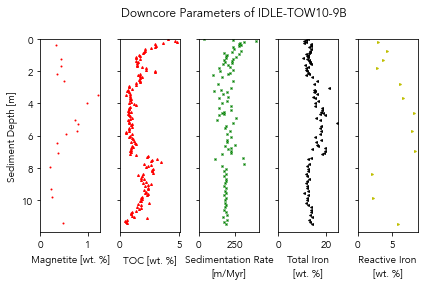

In [5]:
# plot downcore figures
colors = ["r", "r", "g", "k", 'y']
markers = [".", "^", "x", "<", '>']
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [wt. %]", "TOC [wt. %]", "Sedimentation Rate [m/Myr]", "Total Iron [wt. %]", "Reactive Iron [wt. %]"], comb_df, colors, markers)
dc_fig.suptitle("Downcore Parameters of IDLE-TOW10-9B", x=0.55)
dc_axs[2].set_xlabel("Sedimentation Rate\n[m/Myr]")
dc_axs[3].set_xlabel("Total Iron\n[wt. %]")
dc_axs[4].set_xlabel("Reactive Iron\n[wt. %]")
dc_axs[0].set_ylabel("Sediment Depth [m]")
dc_fig.tight_layout()
dc_fig.savefig("outputs/tamuntuan2015/tamuntuan2015_dc-wt1-sep7.pdf")

In [ ]:
# plot comparison figures
comp_figs, comp_axs = data_fns.plot_comp(["Total Iron [wt. %]", "TOC [wt. %]"], interpolated, ["k", "r"], [".", "."], "Magnetite [wt. %]")

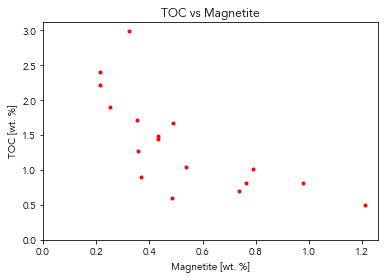

In [14]:
plt.plot(interpolated["Magnetite [wt. %]"], interpolated["TOC [wt. %]"], color="r", marker=".", markersize=6, linestyle="None")
plt.xlabel("Magnetite [wt. %]")
plt.ylabel("TOC [wt. %]")
plt.title("TOC vs Magnetite")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.savefig("outputs/tamuntuan2015/big_TOC.pdf")

In [ ]:
# label and save these if you want
# complicated getting to adjust marker size (just trust me)
comp_axs[0].set(xlabel="Magnetite [wt. %]", ylabel="Total Iron [wt. %]", title="Total Iron vs Magnetite for TOW10-9B")
comp_figs[0].savefig("outputs/tamuntuan2015/tamuntuan2015_fe-tot-comp-wt.pdf")

comp_axs[1].set(xlabel="Magnetite [wt. %]", ylabel="TOC [wt. %]", title="TOC vs Magnetite for TOW10-9B")
comp_figs[1].savefig("outputs/tamuntuan2015/tamuntuan2015_TOC-comp-wt.pdf")

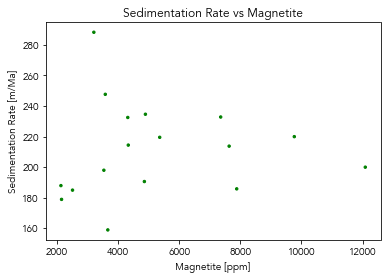

In [13]:
# sed rates comp plot
sed_fig, sed_ax, sed_sc = data_fns.sed_avg_plot(interpolated, 6)
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Myr]", title = "Sedimentation Rate vs Magnetite")
sed_fig.savefig("outputs/tamuntuan2015/tamuntuan2015_sed-comp.pdf")


In [17]:
# last thing to do is add the dataframes we used to the compilation excel doc
# put the raw and interpolated data in separate files
data_fns.write_output(interpolated, "IDLE TOW10-9B", "data/comp_inter.xlsx")
data_fns.write_output(comb_df, "IDLE TOW10-9B", "data/comp_raw.xlsx")